In [1]:
import numpy as np
data = np.genfromtxt("training_boston_x_y_train.csv",delimiter = ',')
x_test = np.genfromtxt("test_boston_x_test.csv",delimiter=',')

In [2]:
data.shape

(379, 14)

In [3]:
x_train = data[:,:13]
y_train = data[:,13:14]
x_train.shape,y_train.shape

((379, 13), (379, 1))

In [4]:
def Preprocessing(xx):
    x = xx.copy()
    for i in range(xx.shape[1]):
        for j in range(xx.shape[1]):
            x = np.append(x,[[gh] for gh in xx[:,i]*xx[:,j]],axis = 1)
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    x = np.append(x,[[1]]*x.shape[0],axis=1)
    return x

In [5]:
x_train = Preprocessing(x_train)
x_test = Preprocessing(x_test)
x_train.shape,x_test.shape

((379, 183), (127, 183))

In [82]:
def cost_fun(x,y,c):
    s = (x*c).sum(axis = 1)
   
    cost = ((y[0]-s)**2).mean()
    
    return cost
def gd_step(x,y,c,lr):
    
    print(cost_fun(x,y,c))
    
    slope = np.zeros(x.shape[1])
    for i in range(x.shape[0]):
        s = (c*x[i]).sum()        
        for j in range(x.shape[1]):   
            slope[j] += -2*x[i][j]*(y[i][0]-s)/x.shape[0]
#     print(slope)
            
    new_c = c - slope*lr
    return new_c

def gd(x,y,c,lr,steps):
    for i in range(steps):
        print(i,end=" ")
        c = gd_step(x,y,c,lr)
        
    return c

In [85]:
cons = np.array([0]*x_train.shape[1])
learning_rate = 0.02
steps = 300
new_c = gd(x_train,y_train,cons,learning_rate,steps)

0 1436.4099999999996
1 1391.4819557596186
2 1326.6492855637557
3 1280.7434559726235
4 1226.3671251989133
5 1181.207303191986
6 1133.7575712994087
7 1091.5430658469993
8 1049.6584199222877
9 1011.2321464361419
10 974.1192400895064
11 939.5769903712949
12 906.6311128132992
13 875.7516016479063
14 846.4666450146526
15 818.9196371422586
16 792.8583918140567
17 768.294512499221
18 745.0750888838113
19 723.1618265181135
20 702.4494651422813
21 682.8838521287142
22 664.3848750073291
23 646.8963267660379
24 630.3531208875706
25 614.7022790066904
26 599.8889170098832
27 585.8650149749592
28 572.5833682455333
29 560.0011959438165
30 548.077479093217
31 536.774395650506
32 526.0561055180663
33 515.8892765736849
34 506.24249357958837
35 497.08640960614264
36 488.39342903608593
37 480.1377095576167
38 472.2949699460198
39 464.84243689425057
40 457.75871325890614
41 451.0237086409514
42 444.61853988814147
43 438.52546099326094
44 432.72778304099916
45 427.2098092043187
46 421.95676794477873
47 416.9

In [86]:
y_train_pred = (x_train*new_c).sum(axis= 1)

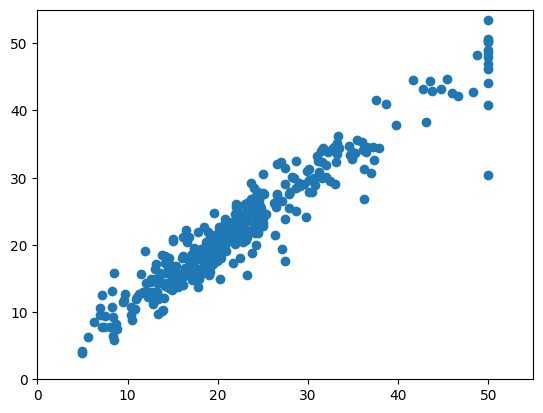

In [87]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_train_pred)
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

In [88]:
y_test_pred = (x_test*new_c).sum(axis= 1)
np.savetxt('22Gradient Descent - Boston Dataset.csv',y_test_pred)